Greedy | Time: 7.65s
  Train -> MSE: 283753937.54, RMSE: 16845.00, R²: 0.9556
  Test  -> MSE: 731956881.48, RMSE: 27054.70, R²: 0.8793

Hill Climbing | Time: 1.53s
  Train -> MSE: 547162746.79, RMSE: 23391.51, R²: 0.9144
  Test  -> MSE: 746971491.77, RMSE: 27330.78, R²: 0.8768

Simulated Annealing | Time: 3.35s
  Train -> MSE: 332581714.58, RMSE: 18236.82, R²: 0.9479
  Test  -> MSE: 672313832.97, RMSE: 25929.02, R²: 0.8891



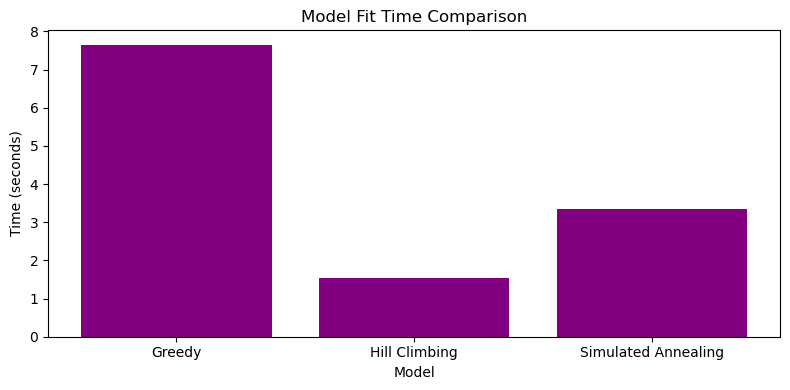

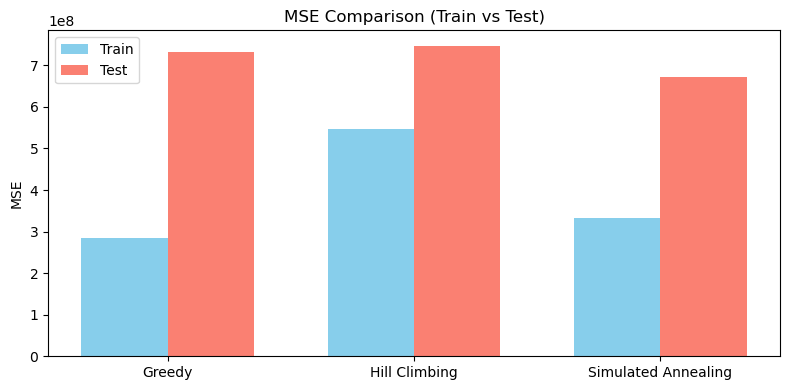

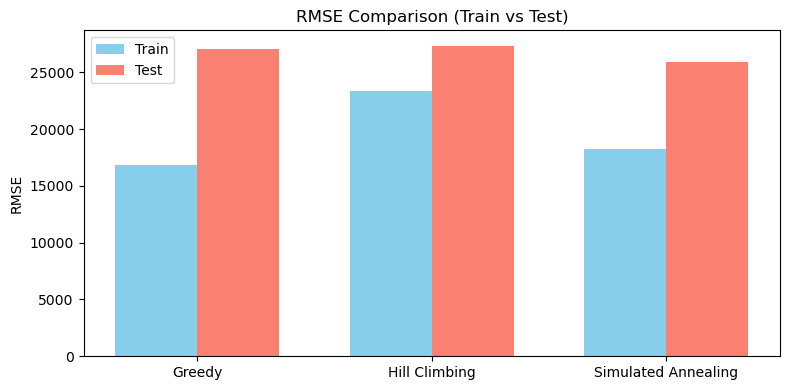

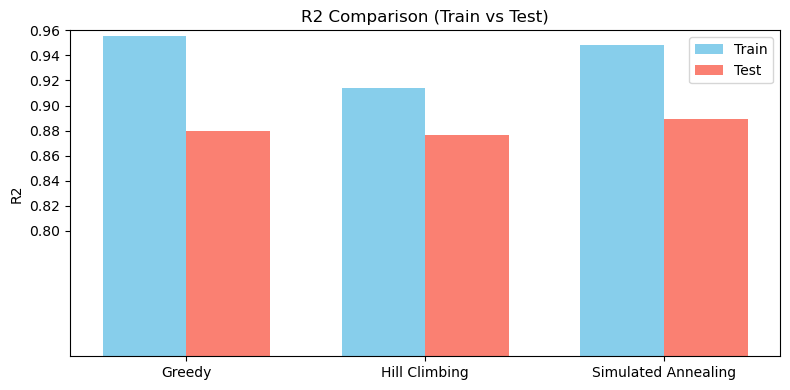

In [13]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from custom_xgoost.xgboost_greedy_split import CustomXGBoostRegressor as GreedyXGB
from custom_xgoost.xgboost_hill_climbing import CustomXGBoostRegressor as HillXGB
from custom_xgoost.xgboost_simulated_annealing import CustomXGBoostRegressor as SimulatedAnnealingXGB

df = pd.read_csv("data/ames.csv")
df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')
y = df["SalePrice"].values
X = df.drop(columns=["SalePrice"]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_classes = [
    ("Greedy", GreedyXGB),
    ("Hill Climbing", HillXGB),
    ("Simulated Annealing", SimulatedAnnealingXGB)
]

fit_times = {}
metrics_train = {"MSE": {}, "RMSE": {}, "R2": {}}
metrics_test = {"MSE": {}, "RMSE": {}, "R2": {}}

for name, Model in model_classes:
    model = Model(n_estimators=100, learning_rate=0.1, max_depth=3)
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    fit_times[name] = fit_time

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    metrics_train["MSE"][name] = mse_train
    metrics_train["RMSE"][name] = rmse_train
    metrics_train["R2"][name] = r2_train

    metrics_test["MSE"][name] = mse_test
    metrics_test["RMSE"][name] = rmse_test
    metrics_test["R2"][name] = r2_test

    print(f"{name} | Time: {fit_time:.2f}s")
    print(f"  Train -> MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
    print(f"  Test  -> MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")
    print()


def plot_fit_times(fit_times_dict):
    plt.figure(figsize=(8, 4))
    plt.bar(fit_times_dict.keys(), fit_times_dict.values(), color='purple')
    plt.title("Model Fit Time Comparison")
    plt.ylabel("Time (seconds)")
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()


def plot_combined_metric(train_dict, test_dict, metric_name):
    models = list(train_dict.keys())
    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(8, 4))
    plt.bar(x - width / 2, [train_dict[m] for m in models], width, label='Train', color='skyblue')
    plt.bar(x + width / 2, [test_dict[m] for m in models], width, label='Test', color='salmon')

    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison (Train vs Test)")
    plt.xticks(x, models)
    plt.legend()

    if metric_name == "R2":
        plt.ylim(0.70, 0.90)
        plt.yticks(np.arange(0.80, 0.98, 0.02))

    plt.tight_layout()
    plt.show()


plot_fit_times(fit_times)

for metric in metrics_train:
    plot_combined_metric(metrics_train[metric], metrics_test[metric], metric)
